# Questoin 2 (Implementation)

## Part 1

---



In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "drive/MyDrive"

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("prostate.data", delimiter="\t", index_col=0)
df.drop('train', axis=1, inplace=True)
df

lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
1  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
2  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
3  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
4  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
5   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
..       ...       ...  ...       ...  ...       ...      ...    ...       ...
93  2.830268  3.876396   68 -1.386294    1  1.321756        7     60  4.385147
94  3.821004  3.896909   44 -1.386294    1  2.169054        7     40  4.684443
95  2.907447  3.396185   52 -1.386294    1  2.463853        7     10  5.143124
96  2.882564  3.773910   68  1.558145    1  1.558145        7     80  5.477509
97  3.471966  3.974998   68  0.438255    1  2.904165        7     20  5.582932

[97 rows x 9 columns]

In [5]:
df.describe()

lcavol    lweight        age  ...    gleason       pgg45       lpsa
count  97.000000  97.000000  97.000000  ...  97.000000   97.000000  97.000000
mean    1.350010   3.628943  63.865979  ...   6.752577   24.381443   2.478387
std     1.178625   0.428411   7.445117  ...   0.722134   28.204035   1.154329
min    -1.347074   2.374906  41.000000  ...   6.000000    0.000000  -0.430783
25%     0.512824   3.375880  60.000000  ...   6.000000    0.000000   1.731656
50%     1.446919   3.623007  65.000000  ...   7.000000   15.000000   2.591516
75%     2.127041   3.876396  68.000000  ...   7.000000   40.000000   3.056357
max     3.821004   4.780383  79.000000  ...   9.000000  100.000000   5.582932

[8 rows x 9 columns]

In [6]:
normalized_df=(df-df.mean())/df.std()
normalized_df

lcavol   lweight       age  ...   gleason     pgg45      lpsa
1  -1.637356 -2.006212 -1.862426  ... -1.042157 -0.864467 -2.520226
2  -1.988980 -0.722009 -0.787896  ... -1.042157 -0.864467 -2.287827
3  -1.578819 -2.188784  1.361163  ...  0.342627 -0.155348 -2.287827
4  -2.166917 -0.807994 -0.787896  ... -1.042157 -0.864467 -2.287827
5  -0.507874 -0.458834 -0.250631  ... -1.042157 -0.864467 -1.825150
..       ...       ...       ...  ...       ...       ...       ...
93  1.255920  0.577607  0.555266  ...  0.342627  1.262889  1.651834
94  2.096506  0.625489 -2.668323  ...  0.342627  0.553770  1.911116
95  1.321402 -0.543304 -1.593794  ...  0.342627 -0.509907  2.308473
96  1.300290  0.338384  0.555266  ...  0.342627  1.972007  2.598152
97  1.800367  0.807764  0.555266  ...  0.342627 -0.155348  2.689480

[97 rows x 9 columns]

In [7]:
normalized_df.describe().loc[('mean','std'), :]

lcavol       lweight  ...         pgg45          lpsa
mean  7.325183e-17  8.011919e-16  ... -4.091801e-17 -7.554095e-16
std   1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00

[2 rows x 9 columns]

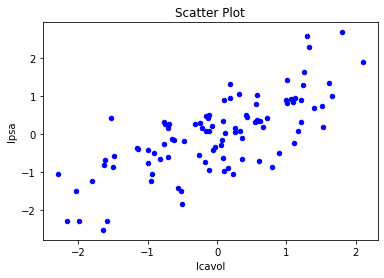

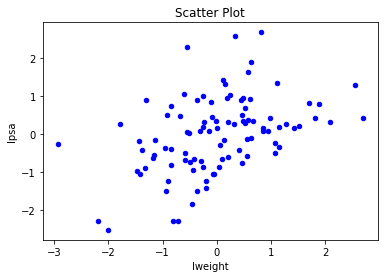

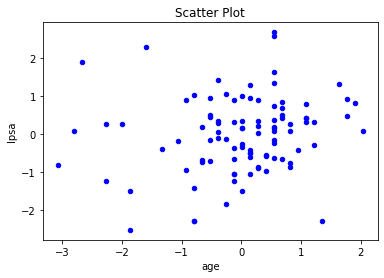

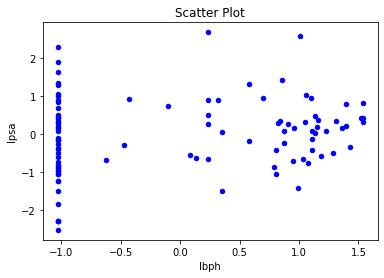

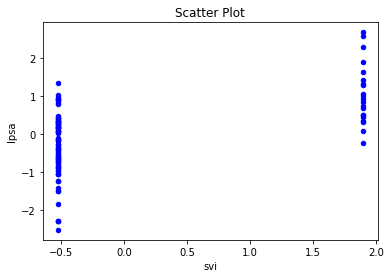

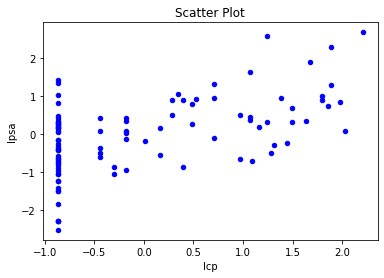

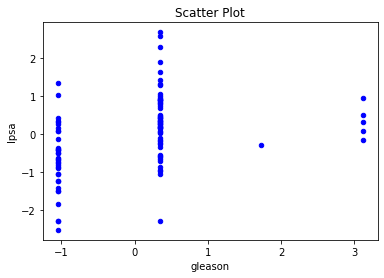

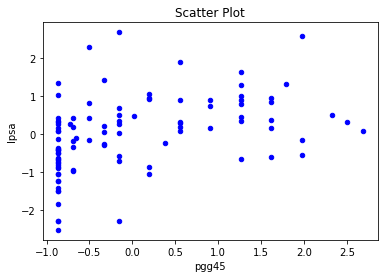

In [8]:
cols = list(normalized_df.columns)
cols.remove('lpsa')
for col in cols:
  normalized_df.plot.scatter(x=str(col), y='lpsa', c='Blue', title='Scatter Plot')

## choosing a reasonable value of $\lambda$ and $\sigma^2$ for a meaningful data analysis.

In [9]:
X = normalized_df[cols].to_numpy()
y = normalized_df['lpsa'].to_numpy()
X.shape, y.shape

((97, 8), (97,))

$\hat{w} = (X^TX)^{-1}X^Ty$

In [10]:
w_hat = np.dot(np.linalg.inv(np.dot(X.T, X)) , np.dot(X.T, y))
w_hat

array([ 0.57621928,  0.23085294, -0.13704517,  0.12155214,  0.2731707 ,
       -0.1284605 ,  0.03079639,  0.10891159])

$N$ : # of data points = X.shape\[0\] \\
$p$ : # of features = X.shape\[1\] \\
${\hat{σ}}^2 = \frac{1}{N-p} {{\lVert y - X\hat{w}\rVert}^2} = \frac{1}{N-p} \sum_{i=1}^{N}{{\hat{e}_i}^2}$

In [11]:
sigma2_hat = np.sum(np.square(y - np.dot(X, w_hat))) / (X.shape[0] - X.shape[1])
sigma2_hat

0.36308541249554216

$\hat{Var}(\hat{w}) = (X^TX)^{-1}{\hat{σ}}^2$ \\
$\hat{\lambda} = mean\left(diag\left(\hat{Var}(\hat{w})\right)\right)$

In [12]:
var_hat_w_hat = np.dot(np.linalg.inv(np.dot(X.T, X)) , sigma2_hat)
lambda_hat = np.mean(np.diag(var_hat_w_hat))
lambda_hat

0.007930183144791905

In [13]:
lambda_prime_hat = sigma2_hat / lambda_hat
lambda_prime_hat

45.7852493273117

Iterative updating of $\hat{\lambda^{'}}$ : 

In [14]:
lph = list()
lh = list()
s2h = list()
w_hat = np.dot(np.linalg.inv(np.dot(X.T, X)) , np.dot(X.T, y))
sigma2_hat = np.sum(np.square(y - np.dot(X, w_hat))) / (X.shape[0] - X.shape[1])
var_hat_w_hat = np.dot(np.linalg.inv(np.dot(X.T, X)) , sigma2_hat)
for i in range(29):
  lambda_hat = np.mean(np.diag(var_hat_w_hat))
  lph.append(sigma2_hat / lambda_hat)
  lh.append(lambda_hat)
  s2h.append(sigma2_hat)
  w_hat = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_hat * np.identity(X.shape[1])) , np.dot(X.T, y))
  sigma2_hat = np.sum(np.square(y - np.dot(X, w_hat))) / (X.shape[0] - X.shape[1])
  var_hat_w_hat = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_hat * np.identity(X.shape[1])) , sigma2_hat)
lambda_hat = np.mean(np.diag(var_hat_w_hat))
lph.append(sigma2_hat / lambda_hat)
lh.append(lambda_hat)
s2h.append(sigma2_hat)
lambda_prime_hat = lph[-1]

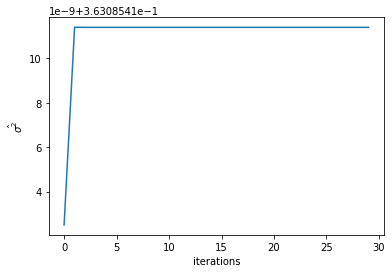

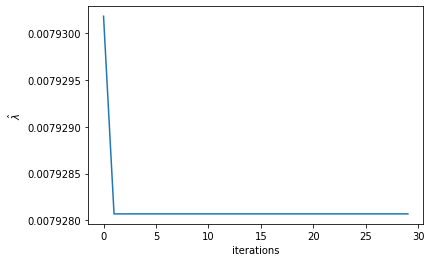

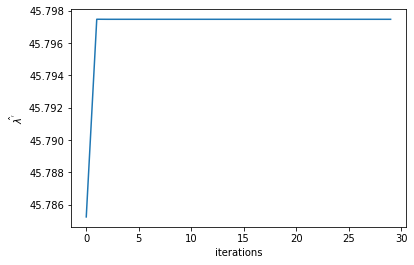

In [15]:
plt.xlabel('iterations')
plt.ylabel('$\hat{\sigma^2}$')
plt.plot(s2h)
plt.figure()
plt.xlabel('iterations')
plt.ylabel('$\hat{\lambda}$')
plt.plot(lh)
plt.figure()
plt.xlabel('iterations')
plt.ylabel('$\hat{\lambda^{\'}}$')
plt.plot(lph)

Above plots show that ${\hat{σ}}^2$, $\hat{\lambda}$ , and $\hat{λ^{'}} = \frac{\hat{\sigma^2}}{\hat{\lambda}}$ converge very soon.

In [16]:
print("chosen sigma^2 =", sigma2_hat)
print("chosen lambda =", lambda_hat)
lambda_prime_hat = sigma2_hat / lambda_hat

chosen sigma^2 = 0.3630854213956639
chosen lambda = 0.007928069346202079


## Part 2 & 3

---



In [18]:
def calc_pi(theta):
  prior = st.multivariate_normal(mean=np.zeros((num_features,)), cov=lambda_hat*np.identity(num_features)).pdf(theta)
  likelihood = st.multivariate_normal(mean=np.dot(X, theta), cov=sigma2_hat*np.identity(num_data)).pdf(y)
  return prior*likelihood

In [19]:
num_data = X.shape[0]
num_features = X.shape[1]
num_accepted = 0
theta = np.zeros((num_features,))
var_th = 0.001
num_iters = 200000
samples = np.zeros((num_iters+1, num_features))
samples[0] = theta

for i in range(num_iters):
    theta_temp = theta + st.multivariate_normal(mean=np.zeros((num_features,)), cov=var_th*np.identity(num_features)).rvs()
    ratio = np.minimum(1, calc_pi(theta_temp)/calc_pi(theta))
    u = np.random.uniform()
    if u < ratio:
        num_accepted += 1
        theta = theta_temp
    samples[i+1] = theta
    if i % 10000 == 0:
      print("Iteration:", i)

print("Efficiency = ", num_accepted/num_iters)

Iteration: 0
Iteration: 10000
Iteration: 20000
Iteration: 30000
Iteration: 40000
Iteration: 50000
Iteration: 60000
Iteration: 70000
Iteration: 80000
Iteration: 90000
Iteration: 100000
Iteration: 110000
Iteration: 120000
Iteration: 130000
Iteration: 140000
Iteration: 150000
Iteration: 160000
Iteration: 170000
Iteration: 180000
Iteration: 190000
Efficiency =  0.4108


We know from **Question 1**: \\
\begin{equation}
\begin{aligned}
& \mathbf{p} (\mathbf{w} \mid \mathcal{D}) \equiv \mathbf{p} (\mathbf{w} \mid \mathbf{X} , \mathbf{y} , \lambda , \sigma^2) = \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})\\ & \mathbf{\mu} = \mathbf{\left(\frac{1}{\sigma^2}X^TX + \frac{1}{\lambda}I\right)^{-1} (\frac{1}{\sigma^2})(X^Ty) = \left(X^TX + \underbrace{\frac{\sigma^2}{\lambda}}_{\lambda^{'}} I\right)^{-1}X^Ty}\\
& \mathbf{\Sigma} = \mathbf{\sigma^2 \left(X^TX + \underbrace{\frac{\sigma^2}{\lambda}}_{\lambda^{'}} I\right)^{-1}}
\end{aligned}
\end{equation}

In [20]:
mu = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_prime_hat * np.identity(num_features)), np.dot(X.T, y))
Sigma = sigma2_hat * np.linalg.inv(np.dot(X.T, X) + lambda_prime_hat * np.identity(num_features))
print(mu, "\n")
print(Sigma)

[ 0.33215026  0.18255351 -0.0388744   0.07528906  0.18634862  0.07341908
  0.05020506  0.06371402] 

[[ 3.54874779e-03 -4.45504720e-04 -2.22260679e-04  1.08106343e-04
  -6.04612116e-04 -1.08417312e-03 -4.23310504e-04 -1.07331419e-04]
 [-4.45504720e-04  3.01686203e-03 -4.72271049e-04 -8.06026145e-04
  -1.72379413e-04 -1.02087902e-04  1.95115067e-04  4.03612266e-05]
 [-2.22260679e-04 -4.72271049e-04  2.93390275e-03 -5.18371869e-04
  -4.02267246e-05  1.61000290e-04 -3.07411049e-04 -3.21216125e-04]
 [ 1.08106343e-04 -8.06026145e-04 -5.18371869e-04  2.94950397e-03
   2.88806211e-04  3.88125047e-05 -9.05082039e-05 -9.29341011e-05]
 [-6.04612116e-04 -1.72379413e-04 -4.02267246e-05  2.88806211e-04
   3.44595909e-03 -1.09551797e-03  3.02189998e-05 -4.32455857e-04]
 [-1.08417312e-03 -1.02087902e-04  1.61000290e-04  3.88125047e-05
  -1.09551797e-03  4.08810385e-03 -4.45080584e-04 -8.88333814e-04]
 [-4.23310504e-04  1.95115067e-04 -3.07411049e-04 -9.05082039e-05
   3.02189998e-05 -4.45080584e-04  

In [21]:
estimated_mean = np.mean(samples, axis=0)
estimated_Sigma = np.cov(samples, rowvar=False)
print(estimated_mean, "\n")
print(estimated_Sigma)

[ 0.33378854  0.18162069 -0.03855641  0.0753834   0.18483665  0.07365128
  0.04866138  0.06491272] 

[[ 3.59225794e-03 -4.31967480e-04 -2.38393051e-04  1.17881894e-04
  -5.30270116e-04 -1.11990847e-03 -3.59768495e-04 -1.80623718e-04]
 [-4.31967480e-04  2.99585322e-03 -5.30009513e-04 -7.58464109e-04
  -1.57642784e-04 -8.80688229e-05  1.51571727e-04  8.56516461e-05]
 [-2.38393051e-04 -5.30009513e-04  3.04212478e-03 -5.32737299e-04
  -7.01739415e-05  1.41040615e-04 -2.62013008e-04 -3.74408645e-04]
 [ 1.17881894e-04 -7.58464109e-04 -5.32737299e-04  2.93685347e-03
   2.96923619e-04  4.25838961e-05 -1.05609252e-04 -9.45463990e-05]
 [-5.30270116e-04 -1.57642784e-04 -7.01739415e-05  2.96923619e-04
   3.42026173e-03 -1.12206607e-03  5.39532095e-05 -3.79942190e-04]
 [-1.11990847e-03 -8.80688229e-05  1.41040615e-04  4.25838961e-05
  -1.12206607e-03  4.15588334e-03 -5.47995461e-04 -8.57700165e-04]
 [-3.59768495e-04  1.51571727e-04 -2.62013008e-04 -1.05609252e-04
   5.39532095e-05 -5.47995461e-04  

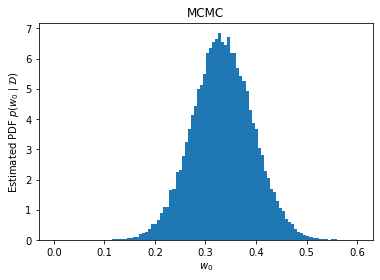

Estimated mean from simulation  =  0.3337885354343574
Analytical mean from Question 1 =  0.3321502561788574
Estimated variance from simulation  =  0.003592257938131
Analytical variance from Question 1 =  0.0035487477896116327


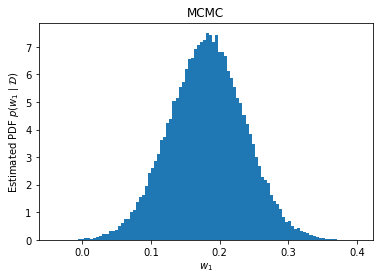

Estimated mean from simulation  =  0.1816206903644591
Analytical mean from Question 1 =  0.18255351167787331
Estimated variance from simulation  =  0.0029958532178547925
Analytical variance from Question 1 =  0.003016862032781106


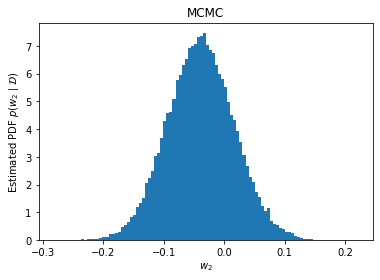

Estimated mean from simulation  =  -0.03855640659980832
Analytical mean from Question 1 =  -0.0388743955365818
Estimated variance from simulation  =  0.0030421247835042756
Analytical variance from Question 1 =  0.0029339027479454933


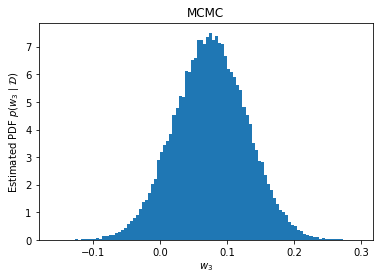

Estimated mean from simulation  =  0.07538339875886156
Analytical mean from Question 1 =  0.07528905630936136
Estimated variance from simulation  =  0.0029368534733415735
Analytical variance from Question 1 =  0.0029495039650010322


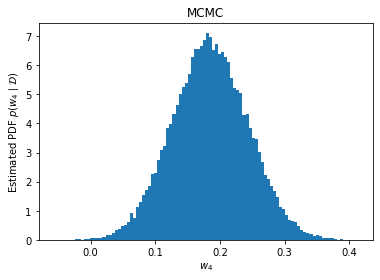

Estimated mean from simulation  =  0.1848366467496539
Analytical mean from Question 1 =  0.18634862202148125
Estimated variance from simulation  =  0.0034202617348794363
Analytical variance from Question 1 =  0.0034459590928989856


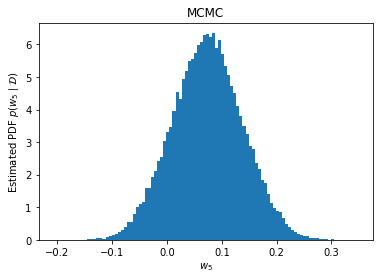

Estimated mean from simulation  =  0.07365127614206476
Analytical mean from Question 1 =  0.07341908360331878
Estimated variance from simulation  =  0.004155883338844781
Analytical variance from Question 1 =  0.0040881038528569925


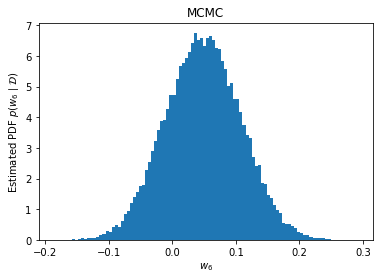

Estimated mean from simulation  =  0.0486613820638213
Analytical mean from Question 1 =  0.05020506212572426
Estimated variance from simulation  =  0.0035366647714583106
Analytical variance from Question 1 =  0.003653123320084214


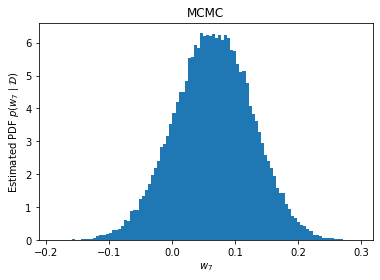

Estimated mean from simulation  =  0.06491272377941855
Analytical mean from Question 1 =  0.06371401661501808
Estimated variance from simulation  =  0.0038204321275851893
Analytical variance from Question 1 =  0.003934767966539479


In [22]:
for i in range(num_features):
  plt.title('MCMC')
  plt.hist(samples[:,i], density=True, bins=100)
  plt.xlabel('$w_{'+str(i)+'}$')
  plt.ylabel('Estimated PDF $p(w_{'+str(i)+'} \mid \mathcal{D})$')
  plt.show()
  print("Estimated mean from simulation  = ", estimated_mean[i])
  print("Analytical mean from Question 1 = ", mu[i])
  print("Estimated variance from simulation  = ", estimated_Sigma[i,i])
  print("Analytical variance from Question 1 = ", Sigma[i,i])

So, we see that the maximum posterior using MCMC samples (which would be the estimated mean) is approximately the same with the theoretical maximum of Question 1.5.

## Part 4

---



In [133]:
cov_X = np.cov(X, rowvar=False)
print(cov_X)

[[ 1.          0.28052138  0.22499988  0.0273497   0.538845    0.67531048
   0.43241706  0.43365225]
 [ 0.28052138  1.          0.34796911  0.4422644   0.1553849   0.16453714
   0.05688209  0.10735379]
 [ 0.22499988  0.34796911  1.          0.3501859   0.11765804  0.12766775
   0.2688916   0.27611245]
 [ 0.0273497   0.4422644   0.3501859   1.         -0.08584324 -0.00699943
   0.07782045  0.07846002]
 [ 0.538845    0.1553849   0.11765804 -0.08584324  1.          0.67311118
   0.32041222  0.45764762]
 [ 0.67531048  0.16453714  0.12766775 -0.00699943  0.67311118  1.
   0.51483006  0.63152825]
 [ 0.43241706  0.05688209  0.2688916   0.07782045  0.32041222  0.51483006
   1.          0.75190451]
 [ 0.43365225  0.10735379  0.27611245  0.07846002  0.45764762  0.63152825
   0.75190451  1.        ]]


In [134]:
eig_values, eig_vectors = np.linalg.eig(cov_X)
print(eig_values, '\n')
print(eig_vectors)

[3.36074519 1.64830632 0.97566104 0.19514862 0.26262383 0.6320111
 0.44221301 0.48329089] 

[[ 0.42224005  0.05369897  0.33161511  0.33648701  0.17349703 -0.10063444
   0.62501055  0.40591991]
 [ 0.18712415 -0.53877313  0.4224938  -0.05978282 -0.01046653  0.13182374
  -0.53236053  0.43787931]
 [ 0.22322795 -0.46863197 -0.24245432 -0.08228769 -0.11361112 -0.79275344
   0.05859594 -0.14212325]
 [ 0.08562866 -0.62886897 -0.08336125  0.03729392  0.08275523  0.51054934
   0.36257288 -0.43575619]
 [ 0.39020837  0.20742156  0.39519323  0.04314492  0.46041071 -0.12037404
  -0.28266012 -0.58336085]
 [ 0.46417852  0.19008255  0.18687032 -0.51526685 -0.6321386   0.13602816
   0.1239651  -0.12048345]
 [ 0.40572527  0.07198888 -0.53818216 -0.44086034  0.49109579  0.15808421
  -0.04920224  0.27860397]
 [ 0.44406941  0.08608338 -0.4062745   0.64290058 -0.31189904  0.15934987
  -0.30557578 -0.03101519]]


We see that the two first values of the `eig_values` are the biggest eigen values of `cov_X`.

In [147]:
P = np.array([eig_vectors[0], eig_vectors[1]])
P

array([[ 0.42224005,  0.05369897,  0.33161511,  0.33648701,  0.17349703,
        -0.10063444,  0.62501055,  0.40591991],
       [ 0.18712415, -0.53877313,  0.4224938 , -0.05978282, -0.01046653,
         0.13182374, -0.53236053,  0.43787931]])

In [148]:
pc_percentage = ((eig_values[0] + eig_values[1]) / np.sum(eig_values)) * 100
print('The percentage of described variance of data (X) using PC1 and PC2 :', pc_percentage)

The percentage of described variance of data (X) using PC1 and PC2 : 62.61314391079953


In [149]:
projected_X = np.dot(X, P.T)

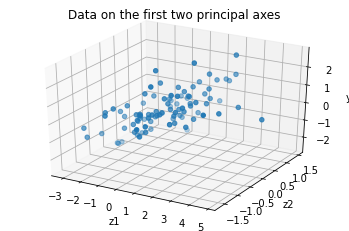

In [150]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(projected_X[:,0], projected_X[:,1], y)
ax.set_title("Data on the first two principal axes")
ax.set_xlabel("z1")
ax.set_ylabel("z2")
ax.set_zlabel("y")
plt.show()

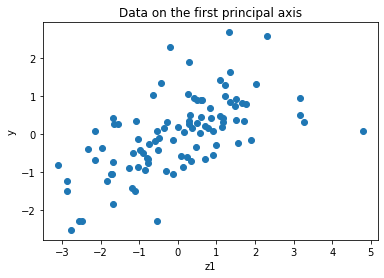

In [151]:
plt.scatter(projected_X[:,0], y)
plt.title("Data on the first principal axis")
plt.xlabel("z1")
plt.ylabel("y")
plt.show()

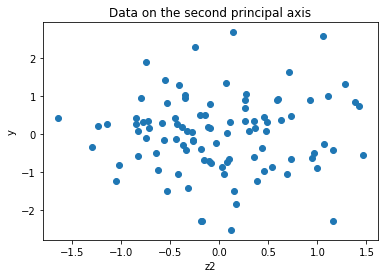

In [152]:
plt.scatter(projected_X[:,1], y)
plt.title("Data on the second principal axis")
plt.xlabel("z2")
plt.ylabel("y")
plt.show()